In [2]:
import numpy as np
import pandas as pd
import pickle
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import random
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
true = pd.read_csv('/content/drive/MyDrive/True.csv')
fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')

In [4]:
true['label'] = 1
fake['label'] = 0

In [5]:
frames = [true.loc[:5000][:], fake.loc[:5000][:]]
df = pd.concat(frames)

In [6]:
X = df.drop('label', axis=1)
y = df['label']
corpus = df['text'].values

In [8]:
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords and stem the words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stopwords.words('english')]

    # Join the words back into a string
    text = ' '.join(text)

    return text

In [9]:
# Apply the clean_text function to the corpus
corpus = [clean_text(doc) for doc in corpus]

corpus = [doc for doc in corpus if doc]

In [11]:
corpus = np.array(corpus)

file_name = '/content/drive/MyDrive/corpus.pkl'
pickle.dump(corpus, open(file_name, 'wb'))

In [12]:
corpus[10001][:100]

'hi folk john harper least ask certain racist islamophob freakshow name jame stachowiak name cours we'

In [7]:
with open('/content/drive/MyDrive/corpus.pkl', 'rb') as fp:
  X = pickle.load(fp)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [20]:
# tfidf vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
ti_train=tfidf_vectorizer.fit_transform(X_train)
ti_test=tfidf_vectorizer.transform(X_test)

In [9]:
""" acc = []
prec = []
rec = []
f1 = []
for i in range(10,210,10):
  pac=PassiveAggressiveClassifier(max_iter=i)
  pac.fit(ti_train,y_train)

  y_pred=pac.predict(ti_test)
  acc.append(accuracy_score(y_test, y_pred) * 100)
  prec.append(precision_score(y_test, y_pred) * 100)
  rec.append(recall_score(y_test, y_pred) * 100)
  f1.append(f1_score(y_test, y_pred) * 100)
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(np.linspace(10,200,num=20),acc)
axis[0, 0].set_title("Accuracy")
axis[0, 1].plot(np.linspace(10,200,num=20),prec)
axis[0, 1].set_title("Precision")
axis[1, 0].plot(np.linspace(10,200,num=20),rec)
axis[1, 0].set_title("Recall")
axis[1, 1].plot(np.linspace(10,200,num=20),f1)
axis[1, 1].set_title("F1-Score")
plt.tight_layout() """

pac = PassiveAggressiveClassifier(max_iter=60)
pac.fit(ti_train,y_train)
y_pred = pac.predict(ti_test)
acc = (accuracy_score(y_test, y_pred) * 100)
prec = (precision_score(y_test, y_pred) * 100)
rec = (recall_score(y_test, y_pred) * 100)
f1 = (f1_score(y_test, y_pred) * 100)
print(f'Accuracy: {round(acc,2)}%')
print(f'Precision: {round(prec,2)}%')
print(f'Recall: {round(rec,2)}%')
print(f'F1-Score: {round(f1,2)}%')

Accuracy: 99.7%
Precision: 99.67%
Recall: 99.74%
F1-Score: 99.7%


Confusion Matrix without Normalization


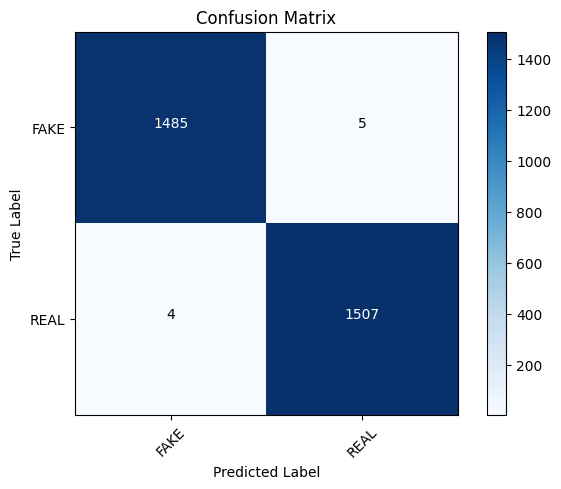

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [11]:
NB = MultinomialNB()
NB.fit(ti_train,y_train)
y_pred = NB.predict(ti_test)
acc = (accuracy_score(y_test, y_pred) * 100)
prec = (precision_score(y_test, y_pred) * 100)
rec = (recall_score(y_test, y_pred) * 100)
f1 = (f1_score(y_test, y_pred) * 100)
print(f'Accuracy: {round(acc,2)}%')
print(f'Precision: {round(prec,2)}%')
print(f'Recall: {round(rec,2)}%')
print(f'F1-Score: {round(f1,2)}%')

Accuracy: 95.1%
Precision: 93.83%
Recall: 96.62%
F1-Score: 95.21%


In [37]:
from sklearn.ensemble import RandomForestClassifier
acc = []
prec = []
rec = []
f1 = []
n_estimators = [1, 2, 4, 8, 16, 32, 64]
for i in n_estimators:
  clf = RandomForestClassifier(n_estimators = i)
  clf.fit(ti_train, y_train)
  y_pred = clf.predict(ti_test)
  acc.append(accuracy_score(y_test, y_pred) * 100)
  prec.append(precision_score(y_test, y_pred) * 100)
  rec.append(recall_score(y_test, y_pred) * 100)
  f1.append(f1_score(y_test, y_pred) * 100)
print(acc,prec,rec,f1)
'''' figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(n_estimators,acc)
axis[0, 0].set_title("Accuracy")
axis[0, 1].plot(n_estimators,prec)
axis[0, 1].set_title("Precision")
axis[1, 0].plot(n_estimators,rec)
axis[1, 0].set_title("Recall")
axis[1, 1].plot(n_estimators,f1)
axis[1, 1].set_title("F1-Score")
plt.tight_layout() '''

#16 estimators seem to be optimal

[95.90136621126291, 88.77040986337887, 91.83605464845051, 98.10063312229256, 98.66711096301233, 99.66677774075309, 99.70009996667777] [95.12353706111834, 98.75415282392026, 98.39449541284404, 99.32157394843962, 99.52861952861953, 99.80092899800928, 100.0] [96.82329583057577, 78.6896095301125, 85.17538054268697, 96.88947716743878, 97.81601588352085, 99.53673064195897, 99.40436796823295] [95.96589045588718, 87.58747697974218, 91.30897481376374, 98.09045226130654, 98.6648865153538, 99.66865473823724, 99.70129439097245]


'\' figure, axis = plt.subplots(2, 2)\naxis[0, 0].plot(n_estimators,acc)\naxis[0, 0].set_title("Accuracy")\naxis[0, 1].plot(n_estimators,prec)\naxis[0, 1].set_title("Precision")\naxis[1, 0].plot(n_estimators,rec)\naxis[1, 0].set_title("Recall")\naxis[1, 1].plot(n_estimators,f1)\naxis[1, 1].set_title("F1-Score")\nplt.tight_layout() '

In [40]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=1, learning_rate = 0.01)
bst.fit(ti_train, y_train)
y_pred = bst.predict(ti_test)
acc = (accuracy_score(y_test, y_pred) * 100)
prec = (precision_score(y_test, y_pred) * 100)
rec = (recall_score(y_test, y_pred) * 100)
f1 = (f1_score(y_test, y_pred) * 100)
print(f'Accuracy: {round(acc,2)}%')
print(f'Precision: {round(prec,2)}%')
print(f'Recall: {round(rec,2)}%')
print(f'F1-Score: {round(f1,2)}%')

Accuracy: 99.93%
Precision: 100.0%
Recall: 99.87%
F1-Score: 99.93%


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 1)
gbc.fit(ti_train, y_train)
y_pred = gbc.predict(ti_test)
acc = (accuracy_score(y_test, y_pred) * 100)
prec = (precision_score(y_test, y_pred) * 100)
rec = (recall_score(y_test, y_pred) * 100)
f1 = (f1_score(y_test, y_pred) * 100)
print(f'Accuracy: {round(acc,2)}%')
print(f'Precision: {round(prec,2)}%')
print(f'Recall: {round(rec,2)}%')
print(f'F1-Score: {round(f1,2)}%')

Accuracy: 99.87%
Precision: 99.8%
Recall: 99.93%
F1-Score: 99.87%


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
y_vect = to_categorical(y)

In [13]:
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y_vect, test_size=0.3, random_state=42)

In [15]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:
#FFN + Softmax
model = Sequential()
model.add(Dense(16, activation='tanh', input_dim=X_vect.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy',f1_m,precision_m, recall_m])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         644,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 645,062 (2.46 MB)

 Trainable params: 645,062 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
num_epochs=15
hist = model.fit(X_train, y_train, batch_size=64, epochs=num_epochs, verbose=2, validation_split=0.25)

Epoch 1/15
83/83 - 4s - 46ms/step - accuracy: 0.9105 - f1_m: 0.9115 - loss: 0.6358 - precision_m: 0.9115 - recall_m: 0.9115 - val_accuracy: 0.9612 - val_f1_m: 0.9601 - val_loss: 0.5058 - val_precision_m: 0.9601 - val_recall_m: 0.9601
Epoch 2/15
83/83 - 1s - 16ms/step - accuracy: 0.9783 - f1_m: 0.9785 - loss: 0.3971 - precision_m: 0.9785 - recall_m: 0.9785 - val_accuracy: 0.9783 - val_f1_m: 0.9768 - val_loss: 0.2853 - val_precision_m: 0.9768 - val_recall_m: 0.9768
Epoch 3/15
83/83 - 3s - 34ms/step - accuracy: 0.9912 - f1_m: 0.9913 - loss: 0.2473 - precision_m: 0.9913 - recall_m: 0.9913 - val_accuracy: 0.9857 - val_f1_m: 0.9851 - val_loss: 0.1964 - val_precision_m: 0.9851 - val_recall_m: 0.9851
Epoch 4/15
83/83 - 2s - 23ms/step - accuracy: 0.9970 - f1_m: 0.9970 - loss: 0.1747 - precision_m: 0.9970 - recall_m: 0.9970 - val_accuracy: 0.9897 - val_f1_m: 0.9890 - val_loss: 0.1491 - val_precision_m: 0.9890 - val_recall_m: 0.9890
Epoch 5/15
83/83 - 1s - 11ms/step - accuracy: 0.9990 - f1_m: 0.9

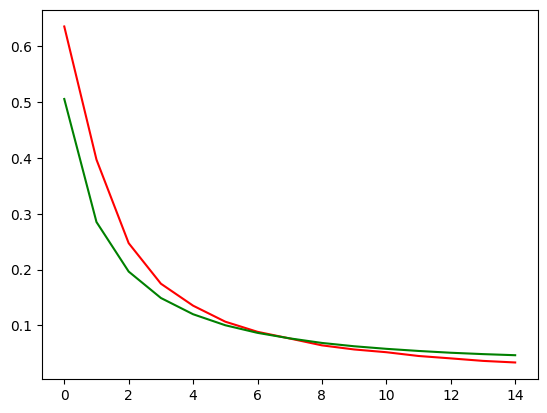

In [18]:
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(num_epochs)
plt.figure()
plt.plot(xc, train_loss, color='red')
plt.plot(xc, val_loss, color='green')
plt.show()

In [17]:
from gensim.models import Word2Vec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
w2v_model = Word2Vec(vector_size=100,
                     window=5,
                     min_count=2)
w2v_model.build_vocab(np.char.split(X_train, sep = " "), progress_per=10000)
w2v_model.train(np.char.split(X_train, sep = " "), total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

(14934860, 15933800)

In [89]:
w2v_model.wv['trump']

array([ 1.0109299e+00, -5.3077292e-01,  5.0654024e-01,  5.0375414e-01,
        5.0665963e-01,  1.2933693e+00,  7.5103199e-01,  8.8489687e-01,
       -6.0712534e-01,  1.9746604e+00,  4.1450346e-01, -8.1953853e-01,
        5.6968643e-03, -8.5240620e-01, -5.3670162e-01, -6.1010349e-01,
        5.3725153e-01,  1.6121772e-01, -7.6479769e-01, -3.5358462e-01,
        5.3084545e-02,  2.5257287e+00,  1.1342112e+00, -7.4614435e-01,
        1.2421972e+00, -6.5919006e-01, -2.5756681e-01,  3.2958966e-01,
       -1.5476176e+00, -5.1465183e-01,  3.9370018e-01, -8.5933834e-01,
        1.7219380e-04, -1.0658655e+00,  3.0113974e-01, -4.8122340e-01,
        1.1395663e+00, -1.7259934e+00,  5.5180281e-01, -2.0112271e+00,
       -1.9861819e+00,  1.2398803e+00, -9.7814345e-01,  9.8851033e-02,
       -8.0171382e-01, -6.2530422e-01,  1.9636160e-01,  9.0785956e-01,
        1.0292411e-01,  2.0406701e-01,  2.8362632e-01,  7.3914230e-01,
       -1.3938023e+00,  7.1634281e-01, -2.9791537e-01, -6.6990542e-01,
      

In [18]:
words = set(w2v_model.wv.index_to_key)
X_train_vect = [[w2v_model.wv[i] for i in ls if i in words]
                         for ls in X_train]
X_test_vect = [[w2v_model.wv[i] for i in ls if i in words]
                         for ls in X_test]

In [19]:
X_train_vect_avg = []
for v in X_train_vect:
    v = np.array(v)
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    v = np.array(v)
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [20]:
'''for i, v in enumerate(X_train_vect_avg):
    print(len(X_train[i]), len(v)) '''

'for i, v in enumerate(X_train_vect_avg):\n    print(len(X_train[i]), len(v)) '

In [21]:
"""
acc = []
prec = []
rec = []
f1 = []
for i in range(10,510,10):
  pac=PassiveAggressiveClassifier(max_iter=i)
  pac.fit(X_train_vect_avg,y_train)
  y_pred=pac.predict(X_test_vect_avg)
  acc.append(accuracy_score(y_test, y_pred) * 100)
  prec.append(precision_score(y_test, y_pred) * 100)
  rec.append(recall_score(y_test, y_pred) * 100)
  f1.append(f1_score(y_test, y_pred) * 100)
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(np.linspace(10,500,num=50),acc)
axis[0, 0].set_title("Accuracy")
axis[0, 1].plot(np.linspace(10,500,num=50),prec)
axis[0, 1].set_title("Precision")
axis[1, 0].plot(np.linspace(10,500,num=50),rec)
axis[1, 0].set_title("Recall")
axis[1, 1].plot(np.linspace(10,500,num=50),f1)
axis[1, 1].set_title("F1-Score")
plt.tight_layout()
"""

pac = PassiveAggressiveClassifier(max_iter=2000)
pac.fit(X_train_vect_avg,y_train)
y_pred = pac.predict(X_test_vect_avg)
acc = (accuracy_score(y_test, y_pred) * 100)
prec = (precision_score(y_test, y_pred) * 100)
rec = (recall_score(y_test, y_pred) * 100)
f1 = (f1_score(y_test, y_pred) * 100)
print(f'Accuracy: {round(acc,2)}%')
print(f'Precision: {round(prec,2)}%')
print(f'Recall: {round(rec,2)}%')
print(f'F1-Score: {round(f1,2)}%')

Accuracy: 66.59%
Precision: 88.23%
Recall: 39.68%
F1-Score: 54.74%


Confusion Matrix without Normalization


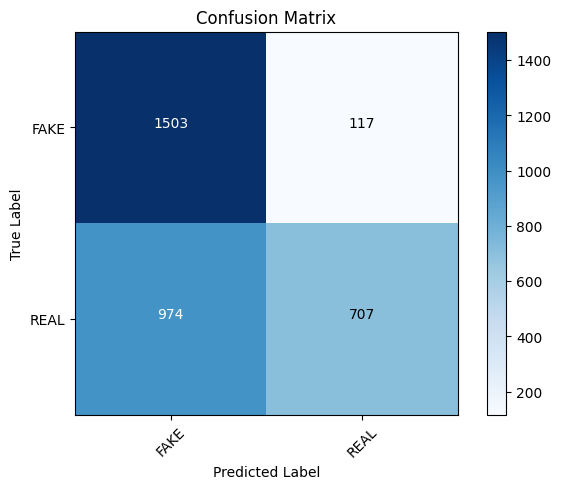

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [23]:
from sklearn.ensemble import RandomForestClassifier
acc = []
prec = []
rec = []
f1 = []
n_estimators = [32, 64, 128, 256, 512, 1000]
for i in n_estimators:
  clf = RandomForestClassifier(n_estimators = i)
  clf.fit(X_train_vect_avg, y_train)
  y_pred = clf.predict(X_test_vect_avg)
  acc.append(accuracy_score(y_test, y_pred) * 100)
  prec.append(precision_score(y_test, y_pred) * 100)
  rec.append(recall_score(y_test, y_pred) * 100)
  f1.append(f1_score(y_test, y_pred) * 100)
print(acc,prec,rec,f1)
'''' figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(n_estimators,acc)
axis[0, 0].set_title("Accuracy")
axis[0, 1].plot(n_estimators,prec)
axis[0, 1].set_title("Precision")
axis[1, 0].plot(n_estimators,rec)
axis[1, 0].set_title("Recall")
axis[1, 1].plot(n_estimators,f1)
axis[1, 1].set_title("F1-Score")
plt.tight_layout() '''

#16 estimators seem to be optimal

[75.4316873674644, 76.55255983035444, 76.82520448348986, 76.85549833383824, 76.73432293244471, 77.06755528627689] [75.8313539192399, 76.72362993517973, 76.78362573099416, 76.85998828353837, 76.43312101910828, 76.6743648960739] [75.96668649613325, 77.45389649018442, 78.10826888756692, 78.04878048780488, 78.52468768590126, 79.00059488399762] [75.89895988112927, 77.08703374777976, 77.4402831023297, 77.44982290436836, 77.46478873239437, 77.82009961910343]


'\' figure, axis = plt.subplots(2, 2)\naxis[0, 0].plot(n_estimators,acc)\naxis[0, 0].set_title("Accuracy")\naxis[0, 1].plot(n_estimators,prec)\naxis[0, 1].set_title("Precision")\naxis[1, 0].plot(n_estimators,rec)\naxis[1, 0].set_title("Recall")\naxis[1, 1].plot(n_estimators,f1)\naxis[1, 1].set_title("F1-Score")\nplt.tight_layout() '

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
clf = XGBClassifier(random_state = 0)
parameters = {'n_estimators':[100,200,300,400,500],'learning_rate':[0.001,0.01,0.1,1.0,2.0,4.0]}
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_train_vect_avg,y_train)

best_clf = grid_fit.best_estimator_
best_clf.fit(X_train_vect_avg, y_train)

AttributeError: 'XGBClassifier' object has no attribute 'best_params_'

In [29]:
grid_fit.best_params_, grid_fit.best_score_

({'learning_rate': 0.1, 'n_estimators': 400}, 0.773915211414961)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 0)
parameters = {'n_estimators':[100,200,300,400,500],'learning_rate':[0.001,0.01,0.1,1.0,2.0,4.0]}
grid_obj_gbc = GridSearchCV(gbc,parameters,scoring=scorer)

grid_fit_gbc = grid_obj_gbc.fit(X_train_vect_avg,y_train)

best_gbc = grid_fit.best_estimator_
best_gbc.fit(X_train_vect_avg, y_train)

In [ ]:
grid_fit_gbc.best_params_, grid_fit_gbc.best_score_

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
y_vect = to_categorical(y)

In [ ]:
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y_vect, test_size=0.3, random_state=42)